In [38]:
!pip install gymnasium

In [39]:
import gymnasium as gym
import numpy as np
import random
import time

In [40]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [41]:
# Hàm argmax của numpy chỉ xét giá trị lớn nhất đầu tiên mà nó gặp, vì vậy nếu áp dụng với Qvalue thì sẽ
# không công bằng với những hành động khác mà đem lại cùng một giá trị lớn nhất.
# Hàm my_argmax sẽ giải quyết vấn đề này bằng cách chọn random giữa những hành động đem lại cùng giá trị lớn nhất.

def my_argmax(l):
    res = []
    max_val = -1000
    for i in range(len(l)):
        if l[i] > max_val:
            max_val = l[i]
            res = [i]
        elif l[i] == max_val:
            res.append(i)
    return random.choice(res)

In [42]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [43]:
# Hyperparameters

# Taxi-v3
# gamma = 0.99
# learning_rate = 0.9
# max_epsilon = 1.0
# min_epsilon = 0.05
# epsilon_decay_rate = 0.001

# num_episodes = 20000
# num_steps_per_episode = 200 # Each environment can have a different episode length

#  FrozenLakev1
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 20000
num_steps_per_episode = 100

# FrozenLake8x8-v1
# gamma = 0.99
# learning_rate = 0.1
# max_epsilon = 1.0
# min_epsilon = 0.01
# epsilon_decay_rate = 0.995
# num_episodes = 20000
# num_steps_per_episode = 200

In [44]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = my_argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [45]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [46]:
q_table

array([[5.45325447e-01, 4.91796804e-01, 4.79811273e-01, 4.95006975e-01],
       [1.21044199e-01, 1.35933883e-01, 7.21923786e-02, 5.07494553e-01],
       [4.41656616e-01, 2.48061377e-01, 1.92028135e-01, 1.44641105e-01],
       [4.26609356e-04, 0.00000000e+00, 3.66007569e-05, 2.24507844e-01],
       [5.61390582e-01, 4.04493397e-01, 2.64661106e-01, 3.79920682e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.11819344e-01, 1.54655523e-01, 1.91091799e-01, 1.35607536e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.75856951e-01, 3.94568743e-01, 3.74825649e-01, 6.01704928e-01],
       [4.11392231e-01, 6.60799694e-01, 3.89396939e-01, 4.14730044e-01],
       [7.07129366e-01, 3.60714086e-01, 3.25983361e-01, 3.60004795e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.20315348e-01, 5.23702411e-01, 7.22911819e

**Q table of Q Learning:**

FrozenLake-v1
```
array([[5.21177809e-01, 5.01713518e-01, 4.98959654e-01, 4.75275371e-01],
       [3.16609709e-01, 2.42013164e-01, 2.83271573e-01, 4.99344357e-01],
       [3.97966974e-01, 2.79472820e-01, 2.66391473e-01, 2.71423827e-01],
       [4.70157912e-07, 1.50950048e-01, 5.73320572e-08, 0.00000000e+00],
       [5.37709499e-01, 2.79769560e-01, 3.23359092e-01, 4.34610291e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30209714e-01, 1.24468321e-01, 3.21834954e-01, 6.31903856e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.43770604e-01, 5.13071711e-01, 3.54623243e-01, 5.70696647e-01],
       [3.28247308e-01, 6.10148173e-01, 4.45728130e-01, 3.30270643e-01],
       [5.75718035e-01, 3.29072751e-01, 4.10012038e-01, 2.73364338e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.46934012e-01, 4.25617784e-01, 6.81068075e-01, 4.52824022e-01],
       [7.14304008e-01, 7.80610931e-01, 7.30735144e-01, 7.34964142e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
```

Taxi-v3

```
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 7.44059051,  8.525849  ,  7.44059051,  8.525849  ,  9.6220697 ,
        -0.474151  ],
       [11.84784175, 12.97761793, 11.84784175, 12.97761793, 14.11880599,
         3.97761793],
       ...,
       [14.11879718, 15.2715212 , 12.30855713, 12.97752362,  5.11880598,
         5.11852346],
       [ 9.62206913, 10.7231233 ,  9.6218191 , 10.72936333,  0.5942458 ,
         0.62045339],
       [17.612     , 16.43588   , 17.612     , 18.8       ,  8.612     ,
         8.612     ]])
```

FrozenLake8x8-v1

```
array([[3.89357304e-01, 3.90896532e-01, 4.10994854e-01, 3.97452277e-01],
       [4.01898203e-01, 3.95539832e-01, 4.25374582e-01, 4.02819126e-01],
       [4.15638535e-01, 4.10301785e-01, 4.43002255e-01, 4.08800451e-01],
       [4.29464802e-01, 4.34035123e-01, 4.58714175e-01, 4.41034116e-01],
       [4.50130568e-01, 4.40285686e-01, 4.79428825e-01, 4.55531471e-01],
       [4.73063760e-01, 4.73107344e-01, 5.06194613e-01, 4.67264176e-01],
       [4.99609007e-01, 4.86567629e-01, 5.18515702e-01, 4.97360863e-01],
       [5.04125051e-01, 5.05469987e-01, 5.19175012e-01, 5.02690762e-01],
       [3.47120632e-01, 3.17861799e-01, 2.77136171e-01, 4.03425990e-01],
       [3.26857070e-01, 3.38135469e-01, 3.43157113e-01, 4.10089632e-01],
       [3.65050159e-01, 3.45929906e-01, 3.84234892e-01, 4.31569327e-01],
       [2.74926902e-01, 3.21374456e-01, 2.71944615e-01, 4.50181136e-01],
       [3.70741080e-01, 4.25709974e-01, 3.94156133e-01, 4.70799858e-01],
       [4.36327728e-01, 4.65159041e-01, 4.38368059e-01, 5.05071201e-01],
       [5.11125071e-01, 5.03409329e-01, 5.29049807e-01, 5.05785233e-01],
       [5.22874081e-01, 5.34667552e-01, 5.27479571e-01, 5.25625702e-01],
       [0.00000000e+00, 1.42134066e-01, 9.61546058e-05, 8.81364899e-04],
       [1.85833451e-02, 6.60478474e-03, 2.88387539e-01, 4.00954930e-02],
       [4.32099130e-02, 0.00000000e+00, 1.67475761e-03, 2.15620156e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21010052e-03, 9.67906230e-03, 1.53138348e-02, 3.66461686e-01],
       [1.30290169e-01, 7.98004941e-02, 1.81050382e-01, 4.70155418e-01],
       [4.91229102e-01, 5.15324031e-01, 5.30426971e-01, 5.02783878e-01],
       [5.54630300e-01, 5.43237246e-01, 5.48446325e-01, 5.47592986e-01],
       [8.80701067e-02, 2.60620654e-03, 1.23343396e-03, 2.70030334e-03],
       [2.07069104e-03, 1.15510878e-03, 3.56706738e-03, 1.23611297e-01],
       [0.00000000e+00, 8.58969378e-04, 9.14064725e-02, 3.60185368e-03],
       [0.00000000e+00, 3.71478405e-02, 0.00000000e+00, 0.00000000e+00],
       [1.10972738e-02, 0.00000000e+00, 1.23514842e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.11912255e-01, 3.83673024e-01, 4.72400283e-01, 3.35504165e-01],
       [5.61297549e-01, 5.66589344e-01, 5.91100505e-01, 5.61020669e-01],
       [2.97646066e-04, 4.06904660e-03, 3.81096116e-02, 0.00000000e+00],
       [2.64718206e-04, 4.82914723e-04, 2.69685621e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.00493763e-02, 4.20309821e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.32487596e-02, 2.16976435e-02, 0.00000000e+00, 1.13871468e-01],
       [2.83633903e-02, 2.05587923e-01, 2.32863627e-02, 1.07239392e-02],
       [2.00148655e-01, 2.29577102e-01, 1.45501915e-01, 4.08731457e-01],
       [6.26833390e-01, 6.28992993e-01, 6.56277686e-01, 6.18976075e-01],
       [0.00000000e+00, 0.00000000e+00, 1.07507670e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.35683756e-02, 0.00000000e+00],
       [5.36911391e-03, 8.46682297e-04, 0.00000000e+00, 1.01379809e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.79732179e-01, 6.22092328e-01, 7.47749232e-01, 5.04806520e-01],
       [0.00000000e+00, 0.00000000e+00, 1.79466883e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69528185e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.82144372e-01, 7.42290202e-01, 9.03317014e-01, 5.58992801e-01],
       [1.23103570e-08, 0.00000000e+00, 5.62603270e-04, 7.35992970e-06],
       [0.00000000e+00, 9.11909253e-05, 0.00000000e+00, 0.00000000e+00],
       [6.78521143e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
       
```

In [47]:
sum(rewards_all)

12660.0

**Sum of rewards of Q Learning**

FrozenLake-v1: 13157.0

Taxi-v3: -143703.0

FrozenLake8x8-v1: 10934.0

In [48]:
sum(rewards_all[0:1000])

90.0

**Sum of rewards from episode 0 to 1000 of Q Learning**

FrozenLake-v1: 293.0

Taxi-v3: -219624.0

FrozenLake8x8-v1: 17.0

In [49]:
sum(rewards_all[1000:2000])

565.0


**Sum of rewards from episode 1000 to 2000 of Q Learning**

FrozenLake-v1: 640.0

Taxi-v3: -11753.0

FrozenLake8x8-v1: 37.0


In [50]:
sum(rewards_all[2000:3000])

661.0


**Sum of rewards from episode 2000 to 3000 of Q Learning**

FrozenLake-v1: 673.0

Taxi-v3: 184.0

FrozenLake8x8-v1: 53.0

In [51]:
sum(rewards_all[9000:10000])

664.0


**Sum of rewards from episode 9000 to 10000 of Q Learning**

FrozenLake-v1: 667.0

Taxi-v3: 5315.0

FrozenLake8x8-v1: 682.0


In [52]:
sum(rewards_all[19000:20000])

671.0


**Sum of rewards from episode 19000 to 20000 of Q Learning**

FrozenLake-v1: 672.0

Taxi-v3: 5040.0

FrozenLake8x8-v1: 812.0


In [53]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [54]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [55]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [56]:
play_multiple_times(env, q_table, 1000)

Number of successes: 740/1000
Average number of steps: 38.48108108108108


**Q Learning's results of playing multiple times**

FrozenLake-v1:


*   Number of successes: 751/1000
*   Average number of steps: 38.241011984021306

Taxi-v3:


*  Number of successes: 1000/1000
*  Average number of steps: 13.192

FrozenLake8x8-v1:


*  Number of successes: 799/1000
*  Average number of steps: 87.64205256570713


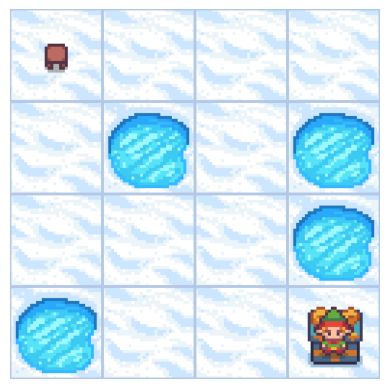

(1.0, 28)

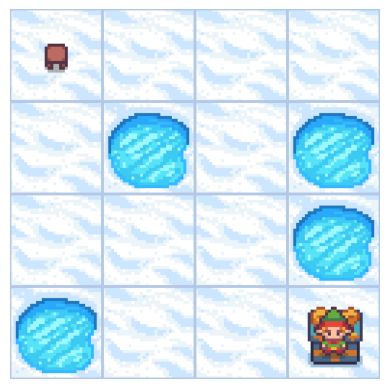

In [57]:
play(env, q_table, render=True)

In [58]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [59]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

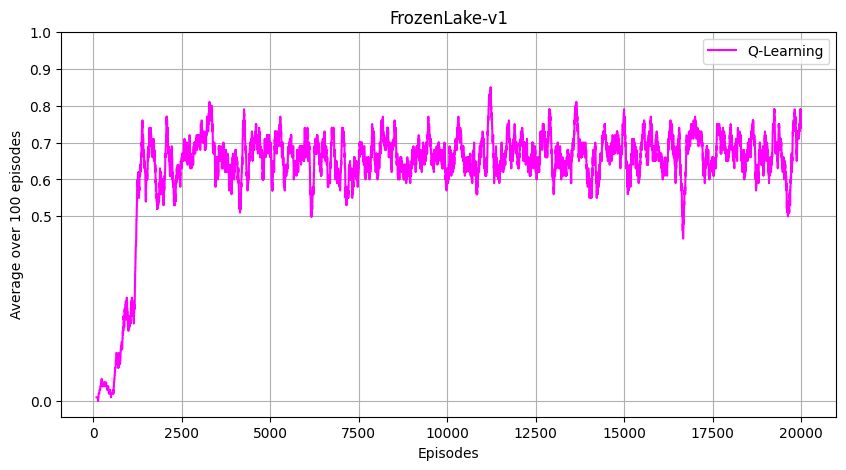

In [60]:
plt.figure(figsize=(10, 5))
plt.title("FrozenLake-v1")
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

**Q Learning average result through all episodes**

FrozenLake-v1

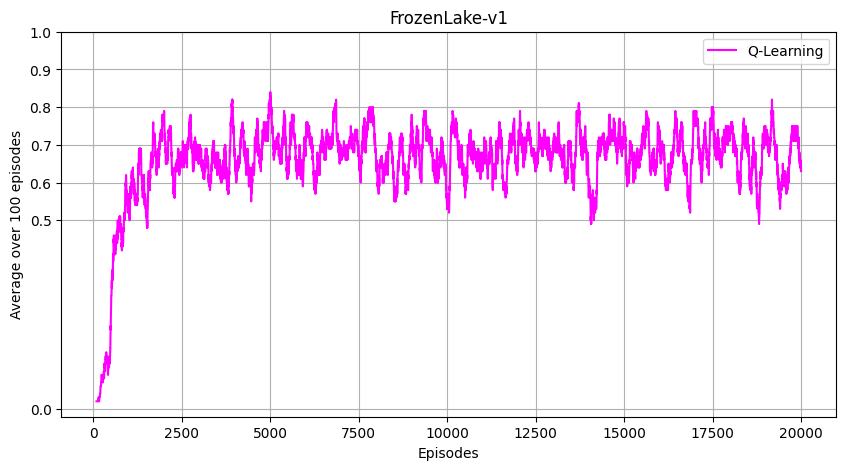


Taxi-v3

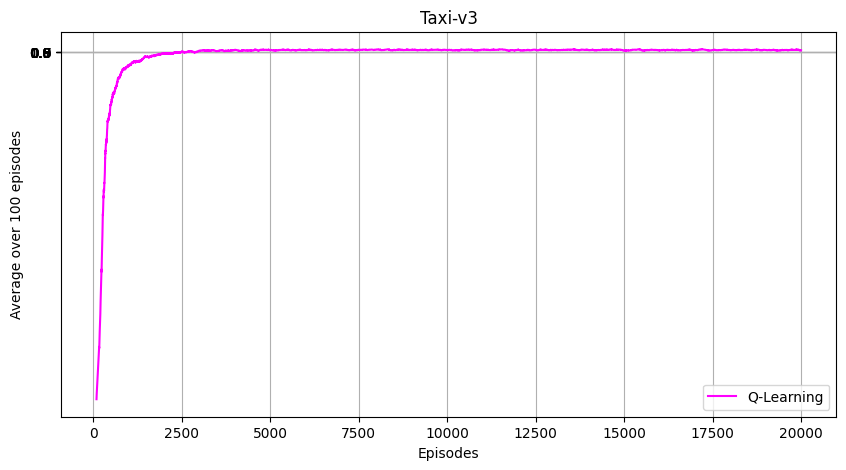

FrozenLake8x8-v1

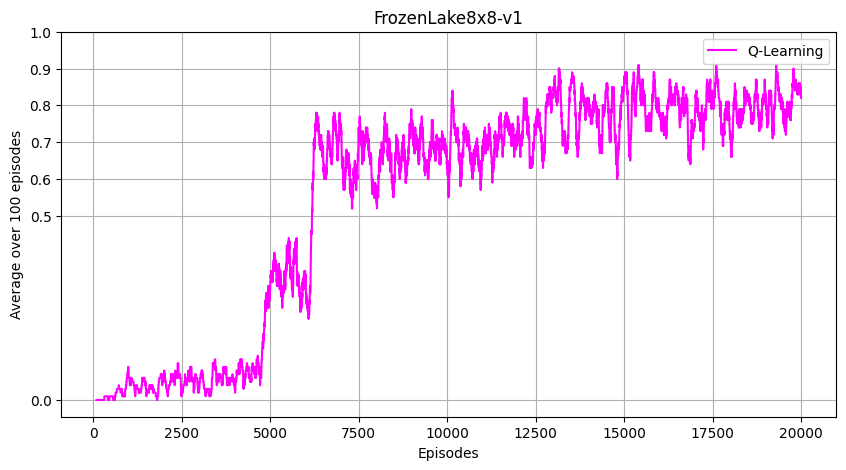

In [61]:
# Hyperparameters

# Taxi-v3
# sarsa_gamma = 0.99
# sarsa_learning_rate = 0.1
# sarsa_max_epsilon = 1.0
# sarsa_min_epsilon = 0.01
# sarsa_epsilon_decay_rate = 0.995

# FrozenLake-v1
sarsa_gamma = 0.99
sarsa_learning_rate = 0.1
sarsa_max_epsilon = 1.0
sarsa_min_epsilon = 0.01
sarsa_epsilon_decay_rate = 0.995

# FrozenLake8x8-v1
# sarsa_gamma = 0.99
# sarsa_learning_rate = 0.1
# sarsa_max_epsilon = 1.0
# sarsa_min_epsilon = 0.01
# sarsa_epsilon_decay_rate = 0.995

In [62]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = my_argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = my_argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [63]:
sarsa_q_table, sarsa_rewards_all = sarsa(env, num_episodes, num_steps_per_episode, sarsa_learning_rate, sarsa_gamma, sarsa_max_epsilon, sarsa_min_epsilon, sarsa_epsilon_decay_rate)

Episode 19999 finished


In [64]:
sarsa_q_table

array([[0.52326781, 0.45952211, 0.44147717, 0.43973881],
       [0.10661369, 0.20352824, 0.1318241 , 0.44134153],
       [0.39663887, 0.2337403 , 0.22366903, 0.21155452],
       [0.13564524, 0.        , 0.        , 0.        ],
       [0.56134771, 0.25407679, 0.34231096, 0.38463074],
       [0.        , 0.        , 0.        , 0.        ],
       [0.47501131, 0.12316778, 0.11400905, 0.07370643],
       [0.        , 0.        , 0.        , 0.        ],
       [0.43199948, 0.30538862, 0.44485444, 0.62506151],
       [0.49584609, 0.68672842, 0.43800322, 0.38024624],
       [0.67060014, 0.3225115 , 0.32805581, 0.31562677],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.42823961, 0.61087867, 0.7615734 , 0.5139223 ],
       [0.65740276, 0.9204619 , 0.76846406, 0.74236795],
       [0.        , 0.        , 0.        , 0.        ]])

**Q table of Sarsa:**

FrozenLake-v1
```
array([[0.5511867 , 0.46500974, 0.4405913 , 0.46127926],
       [0.05236862, 0.13148712, 0.0597053 , 0.40164837],
       [0.31912746, 0.12350233, 0.13909138, 0.15545701],
       [0.0625866 , 0.        , 0.        , 0.03270302],
       [0.5775316 , 0.38174615, 0.36223398, 0.25040299],
       [0.        , 0.        , 0.        , 0.        ],
       [0.28192437, 0.13588023, 0.13134234, 0.08846504],
       [0.        , 0.        , 0.        , 0.        ],
       [0.25137639, 0.39994129, 0.48148147, 0.6047416 ],
       [0.35104957, 0.69293782, 0.39748652, 0.29786475],
       [0.73461822, 0.40072048, 0.21029103, 0.27996381],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.52974344, 0.4016209 , 0.81394285, 0.42640087],
       [0.69578448, 0.89367702, 0.71627398, 0.72690101],
       [0.        , 0.        , 0.        , 0.        ]])
```

Taxi-v3

```
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-3.88252613,  0.18488325, -0.31257244, -0.76349881,  7.75885859,
        -3.10643182],
       [-0.94353138,  0.57745238,  0.49894071,  0.58847186, 13.74851094,
        -1.8804577 ],
       ...,
       [-1.0474691 ,  7.49567019, -1.0618487 , -1.08983192, -1.9       ,
        -1.9099    ],
       [-2.63565911, -2.66332725, -2.64921422, -2.63353049, -3.7973701 ,
        -3.81232056],
       [-0.19      , -0.1999    , -0.19      , 14.02332574, -1.9       ,
        -1.9099    ]])
```

FrozenLake8x8-v1

```
array([[2.98960951e-01, 3.01704128e-01, 3.02346150e-01, 3.36268304e-01],
       [3.01405601e-01, 3.18059100e-01, 3.11936845e-01, 3.52329256e-01],
       [3.21159511e-01, 3.27841409e-01, 3.23143850e-01, 3.75551412e-01],
       [3.15272731e-01, 3.07262151e-01, 3.10106862e-01, 4.13711238e-01],
       [3.83419154e-01, 3.95378561e-01, 4.62906412e-01, 4.09183120e-01],
       [4.38721748e-01, 4.31474954e-01, 4.99171816e-01, 4.41123272e-01],
       [4.74903152e-01, 4.66825315e-01, 5.18612924e-01, 4.61856952e-01],
       [4.76067278e-01, 4.69175467e-01, 5.29337461e-01, 4.78253737e-01],
       [1.06794967e-01, 5.66998153e-02, 2.61510906e-01, 1.32918833e-01],
       [1.11428504e-01, 1.03627673e-01, 2.83148348e-01, 1.81619071e-01],
       [7.24326696e-02, 7.40952171e-02, 4.67712001e-02, 3.02954302e-01],
       [2.83962498e-03, 3.44442298e-02, 2.04792813e-01, 1.33185565e-02],
       [3.05801599e-01, 3.20143032e-01, 4.10914878e-01, 3.01606656e-01],
       [4.02301791e-01, 3.97349720e-01, 4.70789014e-01, 4.20729689e-01],
       [4.68280763e-01, 4.80153915e-01, 5.30582789e-01, 4.71954287e-01],
       [4.90091158e-01, 5.04762779e-01, 5.48638173e-01, 4.81115197e-01],
       [5.81239063e-02, 9.77232677e-03, 4.05398168e-02, 2.36683347e-01],
       [2.22399272e-01, 4.34283675e-02, 8.54350895e-02, 6.11723606e-02],
       [2.28074225e-01, 2.12408746e-02, 2.05872258e-02, 1.25896613e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.08147734e-02, 1.68961731e-01, 3.20043251e-01, 2.25620445e-01],
       [2.49918890e-01, 2.85632486e-01, 1.87396659e-01, 4.54968359e-01],
       [4.88968107e-01, 4.83889989e-01, 5.57537444e-01, 4.68054898e-01],
       [5.00603692e-01, 5.70142768e-01, 5.22955891e-01, 5.12031354e-01],
       [6.12884503e-03, 9.50028198e-02, 2.23552067e-03, 1.27980140e-02],
       [6.25780939e-02, 2.71593447e-02, 1.72987487e-01, 6.94401537e-03],
       [1.87745260e-02, 3.07808530e-02, 2.70081490e-02, 1.79751346e-01],
       [2.68559421e-02, 1.33749174e-01, 1.82060670e-02, 3.73198899e-02],
       [2.00581528e-01, 2.94970303e-02, 4.32063077e-02, 7.39203570e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.58340080e-01, 3.23455133e-01, 5.72066239e-01, 3.23232144e-01],
       [5.74199149e-01, 5.65464145e-01, 6.10075996e-01, 5.48153991e-01],
       [1.46077789e-03, 3.07584665e-03, 7.79406822e-02, 1.94020333e-03],
       [8.30753935e-03, 1.54702294e-03, 1.27329710e-02, 1.14995735e-01],
       [4.37883371e-04, 3.68892039e-04, 1.27344899e-03, 7.88474733e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.28851024e-02, 1.67142855e-02, 1.57699177e-01, 7.34534496e-02],
       [1.91446227e-02, 2.26686913e-01, 7.54078821e-02, 1.32720233e-02],
       [1.46751228e-01, 3.12612148e-01, 3.36773382e-01, 5.32446043e-01],
       [5.76237808e-01, 5.58132212e-01, 7.19338634e-01, 5.63443328e-01],
       [3.53599107e-02, 3.93647113e-04, 1.21326821e-04, 1.86867822e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.55635212e-05, 1.25440471e-04, 1.55335396e-02, 0.00000000e+00],
       [2.92750135e-02, 1.45701865e-04, 7.10475160e-02, 7.24354516e-03],
       [9.82658736e-03, 0.00000000e+00, 0.00000000e+00, 1.13845654e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.66808053e-01, 5.52315863e-01, 7.94280768e-01, 5.79014354e-01],
       [4.50715436e-05, 4.03754983e-05, 1.46543609e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.13897740e-03, 0.00000000e+00],
       [3.42997963e-06, 0.00000000e+00, 0.00000000e+00, 6.04603040e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.87339054e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.05511608e-01, 7.28424722e-01, 9.25257602e-01, 5.82098613e-01],
       [7.89737735e-05, 2.02355225e-06, 2.08430195e-04, 5.70655326e-03],
       [1.88084471e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.82074862e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

```

In [65]:
sum(sarsa_rewards_all)

12116.0



**Sum of rewards of Sarsa**

FrozenLake-v1: 11918.0

Taxi-v3: 30459.0

FrozenLake8x8-v1: 8823.0

In [66]:
sum(sarsa_rewards_all[0:1000])

95.0

**Sum of rewards from episode 0 to 1000 of Sarsa**

FrozenLake-v1: 62.0

Taxi-v3: -105950.0

In [67]:
sum(sarsa_rewards_all[1000:2000])

119.0


**Sum of rewards from episode 1000 to 2000 of Sarsa**

FrozenLake-v1: 281.0

Taxi-v3: 3485.0

FrozenLake8x8-v1: 17.0





In [68]:
sum(sarsa_rewards_all[2000:3000])

352.0


**Sum of rewards from episode 2000 to 3000 of Sarsa**

FrozenLake-v1: 305.0

Taxi-v3: 7033.0

FrozenLake8x8-v1: 28.0

In [69]:
sum(sarsa_rewards_all[9000:10000])

679.0


**Sum of rewards from episode 9000 to 10000 of Sarsa**

FrozenLake-v1: 651.0

Taxi-v3: 7452.0

FrozenLake8x8-v1: 584.0

In [70]:
sum(sarsa_rewards_all[19000:20000])

675.0


**Sum of rewards from episode 19000 to 20000 of Sarsa**

FrozenLake-v1: 653.0

Taxi-v3: 7492.0

FrozenLake8x8-v1: 757.0


In [71]:
play_multiple_times(env, sarsa_q_table, 1000)

Number of successes: 736/1000
Average number of steps: 39.22282608695652


**Sarsa's results of playing multiple times**

FrozenLake-v1:


*   Number of successes: 738/1000
*   Average number of steps: 37.75067750677507

Taxi-v3:


*   Number of successes: 1000/1000
*   Average number of steps: 13.027

FrozenLake8x8-v1:

*   Number of successes: 788/1000
*   Average number of steps: 88.6472081218274


In [ ]:
play(env, sarsa_q_table, render=True)

In [ ]:
# Show sarsa results

window = 100
sarsa_average_y  = []

for ind in range(len(sarsa_rewards_all)-window+1):
    sarsa_average_y.append(np.mean(sarsa_rewards_all[ind:ind + window]))

for ind in range(window - 1):
    sarsa_average_y.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.title("FrozenLake-v1")
plt.plot(np.arange(len(sarsa_rewards_all)), sarsa_average_y, color='blue', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

**Sarsa average result through all episodes**

FrozenLake-v1

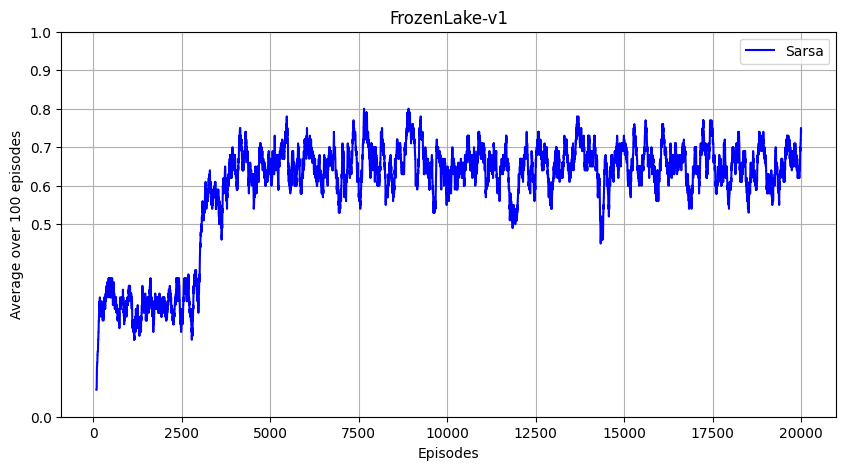

Taxi-v3

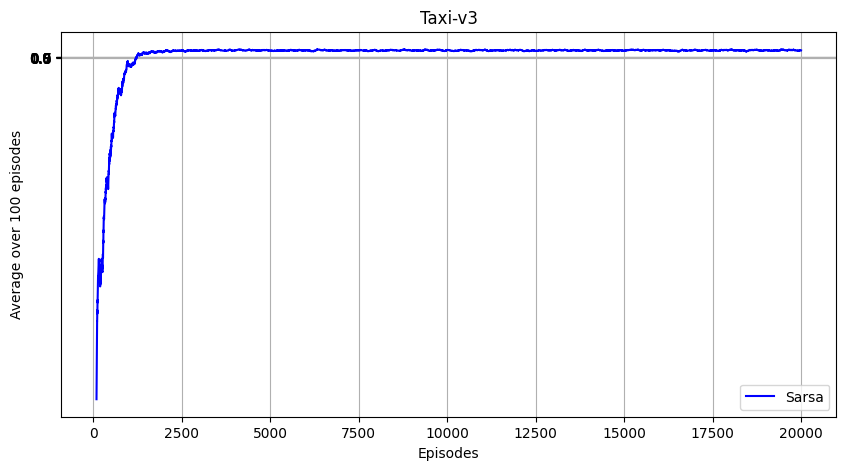

FrozenLake8x8-v1:

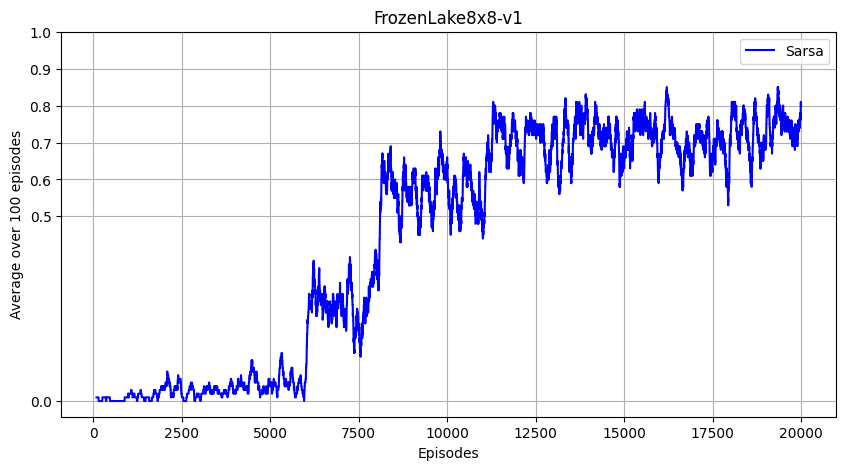

In [ ]:
# Show sarsa vs q_learning result

plt.figure(figsize=(10, 5))
plt.title("FrozenLake-v1")
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all)), sarsa_average_y, color='blue', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

**Sarsa vs Q Learning average results through all episodes**

FrozenLake-v1

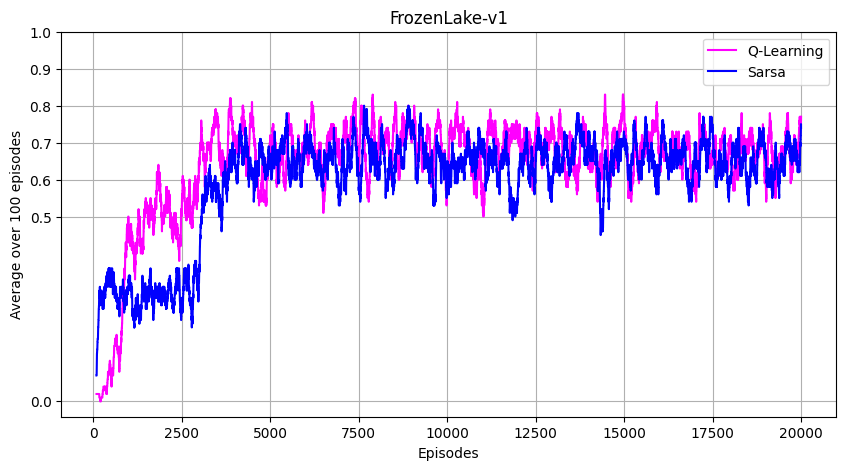

Taxi-v3

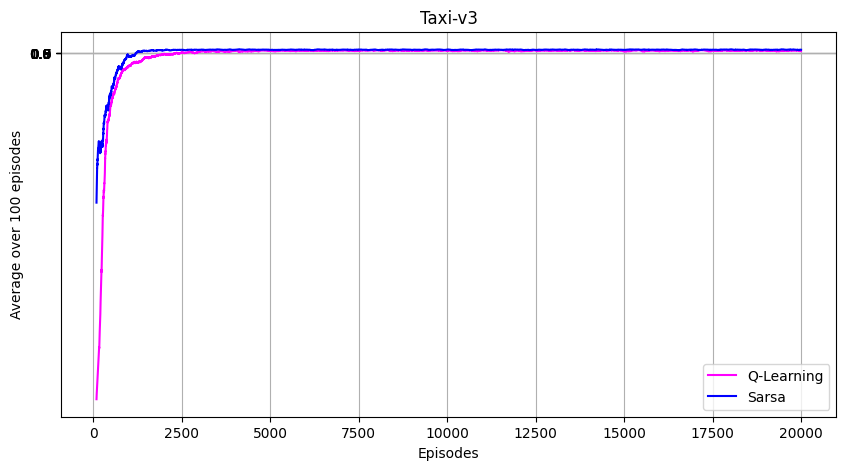

FrozenLake8x8-v1:

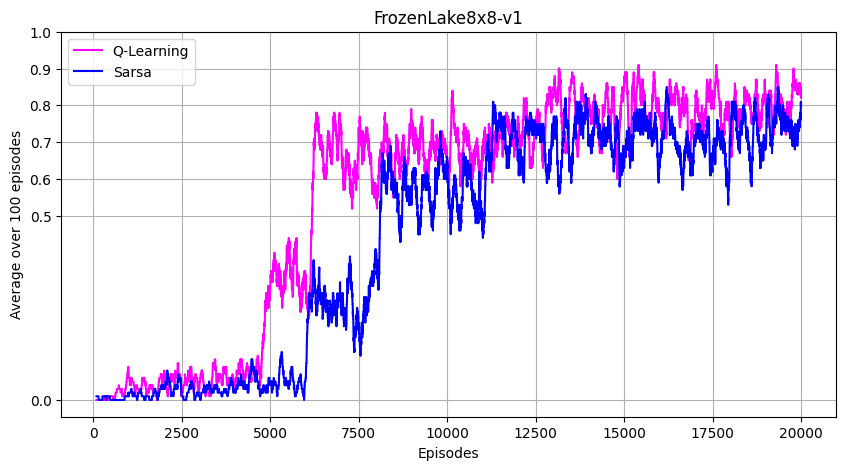

 ### **Nhận xét**: Trên cả 3 môi trường, QLearning và Sarsa đem lại hiệu quả tương tự nhau